# Project Machine Learning : Heart Failure Prediction

## 1. Loading of the data 
Importation of the module, check of the data.
They seems to be okay.

In [5]:
%pip install pandas numpy matplotlib seaborn

231.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc


# data loading
df = pd.read_csv("heart.csv")

# Cheking 
df.info()
df.head()
df.describe()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2. Data analysis and visualization
Here we are doing a transformation of the text data to category for better treatment.
We are also checking the data through the diagrams, everything seems to be okay (except for the first value of the cholesterol in the third scheme, but we are just gonna ignore the data because it's irelevant).
We can see that even if there's often a normal distribution, the data are'nt much correlated on the correlation matrix. We can conclude that each factor is more or less independant from an another one.

/var/folders/_4/dh1fnr496ns8hqmrxrx5v0nm0000gn/T/ipykernel_23401/3476823991.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HeartDisease", palette="viridis")


Text(0.5, 1.0, 'Correlation Matrix')

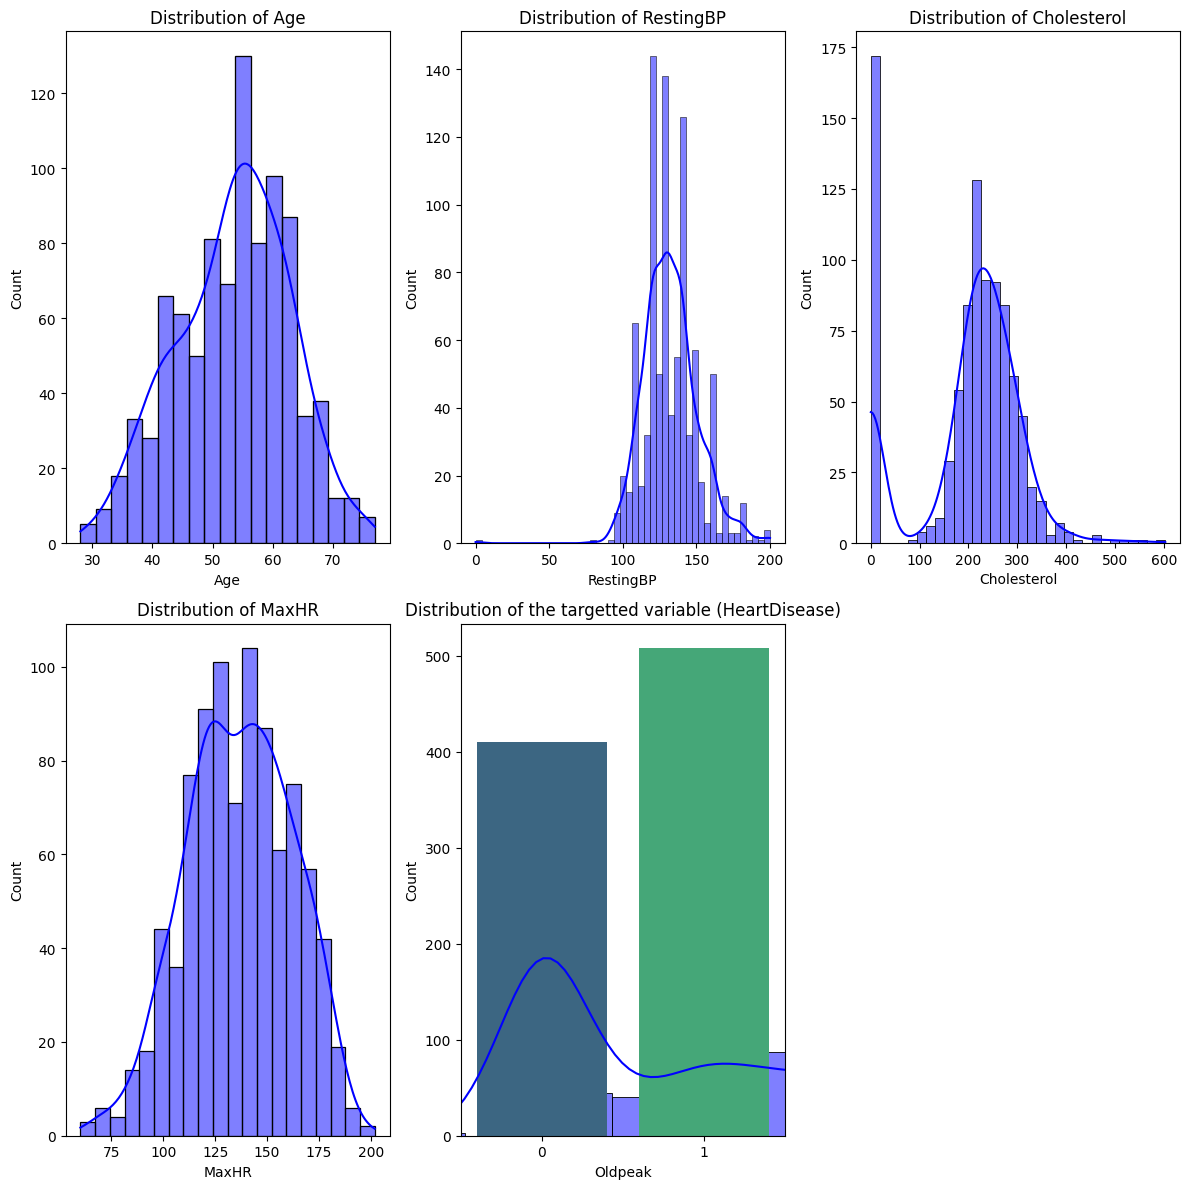

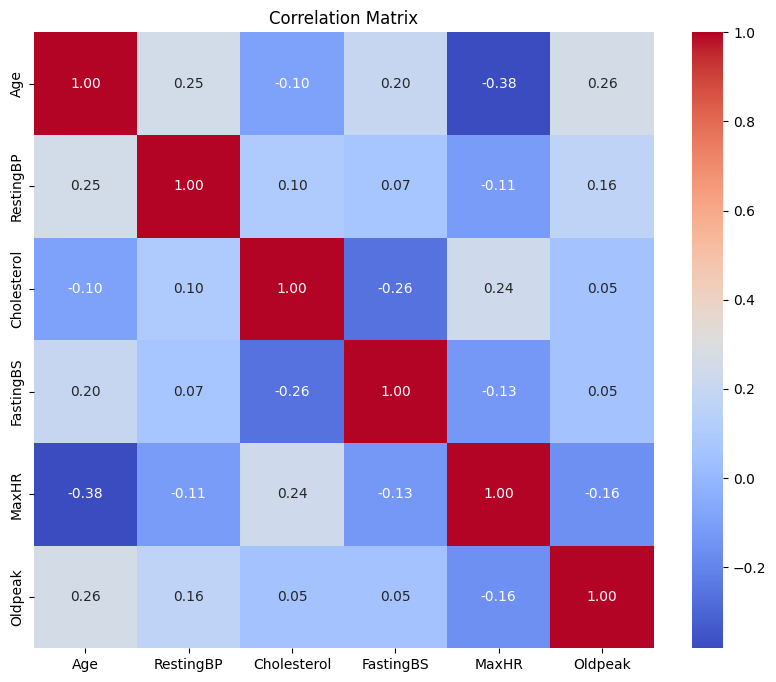

In [7]:
# Transformation of the data
categorical_columns = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype("category")
    else:
        print(f"Colonne manquante : {col}")

continuous_columns = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
fig, axes = plt.subplots(2, 3, figsize=(12, 12))
axes = axes.flatten()  
for i, col in enumerate(continuous_columns):
    if col in df.columns:
        sns.histplot(df[col], kde=True, ax=axes[i], color="blue")
        axes[i].set_title(f"Distribution of {col}")
for j in range(len(continuous_columns), len(axes)):  
    fig.delaxes(axes[j])
plt.tight_layout()

# Distribution of the targetted variable
if "HeartDisease" in df.columns:
    df["HeartDisease"] = df["HeartDisease"].astype("category")
    sns.countplot(data=df, x="HeartDisease", palette="viridis")
    plt.title("Distribution of the targetted variable (HeartDisease)")
else:
    print("Colonne 'HeartDisease' manquante")

# Heatmap 
numeric_df = df.select_dtypes(include="number")  
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")

## 3. Data preprocessing
Transformation of some data to binary for a better process.
Usual data-training with train_test_split.

In [ ]:

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Separation between features and target
X = df_encoded.drop(columns=["HeartDisease"])
y = df_encoded["HeartDisease"]

# train-test-split division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scalling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

## 4. Model training
The greatest question of all time, which algorithm should we use between KNN, the Decison Tree or the Random Forest ? Here we are initiating the three and will compare there score after.

In [12]:

# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
    

## 5. Model evaluation
From what we can learn, KNN and Random Forest are the best algorithm for those data. 
KNN is 1% more precise than Random Forest but the recall of Random Forest is 1% better than the KNN one, and knowing that both algorithm have the exact same score in other domains, we can call it a tie. 
Decision tree is not bad either but it's not enough compare to the other two.

For the science, wa can look at the Roce curve scheme and see that the Random Forest metod is very good because we can see that the Area Under the Curve (AUC) is 0,93. Knowing that an AUC of 1 is the best one we can get, 0,93 isn't bad at all. 

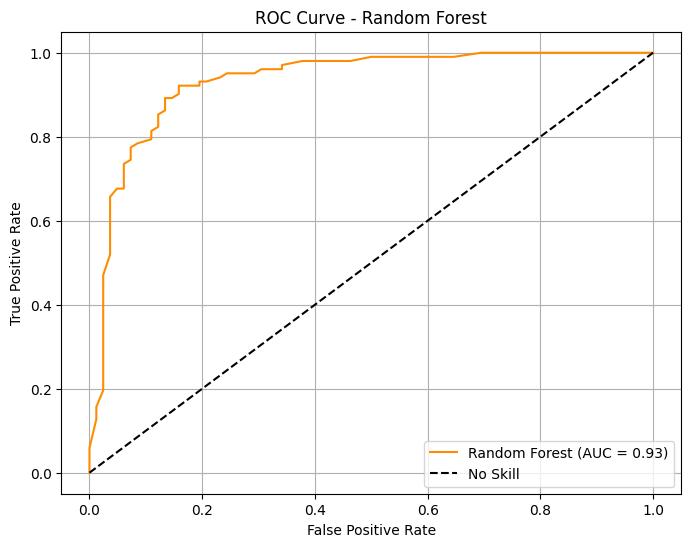

({'Decision Tree': 0.8369565217391305,
  'Random Forest': 0.875,
  'k-Nearest Neighbors': 0.875},
 {'Decision Tree': '              precision    recall  f1-score   support\n\n           0       0.85      0.77      0.81        82\n           1       0.83      0.89      0.86       102\n\n    accuracy                           0.84       184\n   macro avg       0.84      0.83      0.83       184\nweighted avg       0.84      0.84      0.84       184\n',
  'Random Forest': '              precision    recall  f1-score   support\n\n           0       0.86      0.85      0.86        82\n           1       0.88      0.89      0.89       102\n\n    accuracy                           0.88       184\n   macro avg       0.87      0.87      0.87       184\nweighted avg       0.87      0.88      0.87       184\n',
  'k-Nearest Neighbors': '              precision    recall  f1-score   support\n\n           0       0.87      0.84      0.86        82\n           1       0.88      0.90      0.89       

In [ ]:

# Metrics
metrics = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "k-Nearest Neighbors": accuracy_score(y_test, y_pred_knn)
}

# Classification Reports
classification_reports = {
    "Decision Tree": classification_report(y_test, y_pred_dt),
    "Random Forest": classification_report(y_test, y_pred_rf),
    "k-Nearest Neighbors": classification_report(y_test, y_pred_knn)
}

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], "k--", label="No Skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# results summary
metrics, classification_reports, roc_auc_rf
    

This project showed us that no one of the different causes of heart failure is really correlated with another. All factors are equally important. And even if no combination of factors is more serious than another, the accumulation of all of them increases the risk significantly.
In summary, we need to take care at what we do and what we eat, even more when we grow older !